In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data_dir = "https://raw.githubusercontent.com/axchen7/vcsmc/refs/heads/iclr-figures/iclr_figures/data/"

# Compare Q Matrix


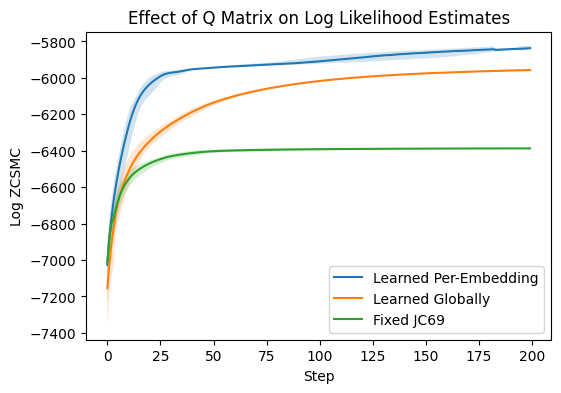

In [2]:
df = pd.read_csv(f"{data_dir}/compare_q_matrix.csv")

# Define the columns to plot
columns_to_plot = [
    (
        "Name: compare_q_matrix-mlp - Log ZCSMC",
        "Name: compare_q_matrix-mlp - Log ZCSMC__MIN",
        "Name: compare_q_matrix-mlp - Log ZCSMC__MAX",
    ),
    (
        "Name: compare_q_matrix-stationary - Log ZCSMC",
        "Name: compare_q_matrix-stationary - Log ZCSMC__MIN",
        "Name: compare_q_matrix-stationary - Log ZCSMC__MAX",
    ),
    (
        "Name: compare_q_matrix-jc69 - Log ZCSMC",
        "Name: compare_q_matrix-jc69 - Log ZCSMC__MIN",
        "Name: compare_q_matrix-jc69 - Log ZCSMC__MAX",
    ),
]

labels = [
    "Learned Per-Embedding",
    "Learned Globally",
    "Fixed JC69",
]

# Plot the data
plt.figure(figsize=(6, 4))

for (col, col_min, col_max), label in zip(columns_to_plot, labels):
    plt.plot(df["Step"], df[col], label=label)
    plt.fill_between(df["Step"], df[col_min], df[col_max], alpha=0.2)

# Add labels and title
plt.xlabel("Step")
plt.ylabel("Log ZCSMC")
plt.title("Effect of Q Matrix on Log Likelihood Estimates")
plt.legend()

# Show the plot
plt.savefig("output/q_matrix_vs_ll.pdf")
plt.show()

# Effect of K


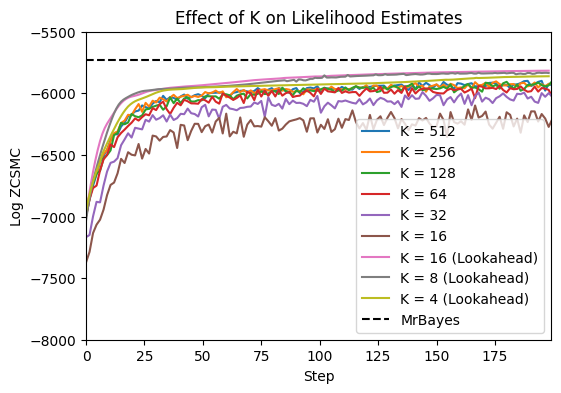

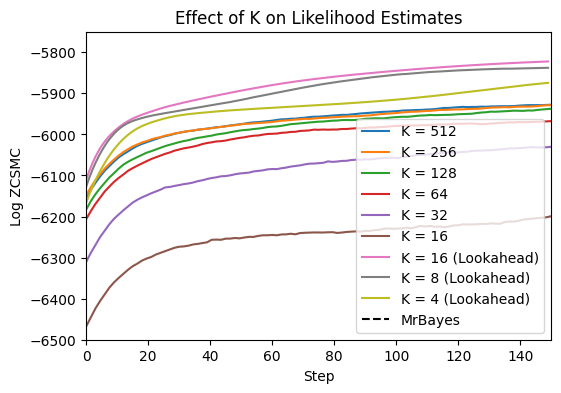

In [3]:
mrbayes = -5730


def plot_effect_of_k(file: str, *, ymin: float, ymax: float, window_size: int):
    # Plot the data
    plt.figure(figsize=(6, 4))

    # ===== non-lookahead runs =====

    df = pd.read_csv(f"{data_dir}/effect_of_k.csv")

    # Define the main columns to plot
    columns = [
        "Name: compare_k-512 - Log ZCSMC",
        "Name: compare_k-256 - Log ZCSMC",
        "Name: compare_k-128 - Log ZCSMC",
        "Name: compare_k-64 - Log ZCSMC",
        "Name: compare_k-32 - Log ZCSMC",
        "Name: compare_k-16 - Log ZCSMC",
    ]

    labels = [
        "K = 512",
        "K = 256",
        "K = 128",
        "K = 64",
        "K = 32",
        "K = 16",
    ]

    # Apply the running average to each series
    smoothed_df = df.copy()

    for col in columns:
        smoothed_df[col] = df[col].rolling(window=window_size).mean()

    # Shift x-axis to start from 1
    smoothed_df["Step"] = smoothed_df["Step"] - window_size

    for col, label in zip(columns, labels):
        plt.plot(smoothed_df["Step"] * 1.5, smoothed_df[col], label=label)

    # ===== lookahead runs =====

    df = pd.read_csv(f"{data_dir}/effect_of_k_lookahead.csv")

    # Define the main columns to plot
    columns = [
        "compare_k-16 - Log ZCSMC",
        "compare_k-8 - Log ZCSMC",
        "compare_k-4 - Log ZCSMC",
    ]

    labels = [
        "K = 16 (Lookahead)",
        "K = 8 (Lookahead)",
        "K = 4 (Lookahead)",
    ]

    # Apply the running average to each series
    smoothed_df = df.copy()

    for col in columns:
        smoothed_df[col] = df[col].rolling(window=window_size).mean()

    # Shift x-axis to start from 1
    smoothed_df["Step"] = smoothed_df["Step"] - window_size

    for col, label in zip(columns, labels):
        plt.plot(smoothed_df["Step"], smoothed_df[col], label=label)

    # ===== plot mrbayes =====

    plt.axhline(mrbayes, color="black", linestyle="--", label="MrBayes")

    # ===== formatting =====

    # Add labels and title
    plt.xlabel("Step")
    plt.ylabel("Log ZCSMC")
    plt.title("Effect of K on Likelihood Estimates")
    plt.legend()

    # Limit the x-axis
    plt.xlim(0, 200 - window_size)

    # Limit the y-axis
    plt.ylim(ymin, ymax)

    # Show the plot
    plt.savefig(file)
    plt.show()


plot_effect_of_k(
    "output/k_vs_ll_with_mrbayes.pdf", ymin=-8000, ymax=-5500, window_size=1
)
plot_effect_of_k(
    "output/k_vs_ll_no_mrbayes.pdf", ymin=-6500, ymax=-5750, window_size=50
)

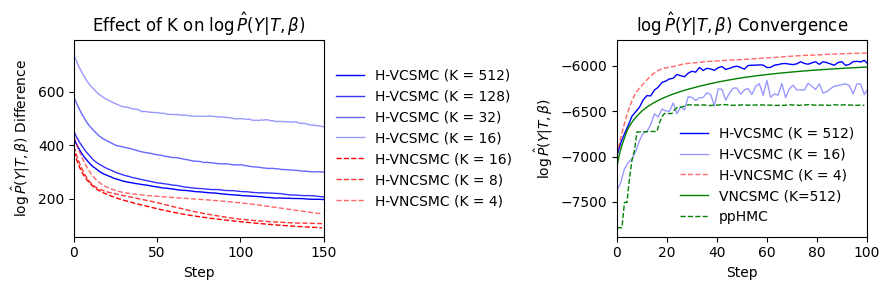

In [4]:
mrbayes = -5730


def plot_effect_of_k(ax):
    window_size = 50

    # ===== non-lookahead runs =====

    df = pd.read_csv(f"{data_dir}/effect_of_k.csv")

    color = "blue"
    alphas = [1.0, 0.8, 0.6, 0.4]

    # Define the main columns to plot
    columns = [
        "Name: compare_k-512 - Log ZCSMC",
        # "Name: compare_k-256 - Log ZCSMC",
        "Name: compare_k-128 - Log ZCSMC",
        # "Name: compare_k-64 - Log ZCSMC",
        "Name: compare_k-32 - Log ZCSMC",
        "Name: compare_k-16 - Log ZCSMC",
    ]

    labels = [
        "H-VCSMC (K = 512)",
        # "K = 256",
        "H-VCSMC (K = 128)",
        # "K = 64",
        "H-VCSMC (K = 32)",
        "H-VCSMC (K = 16)",
    ]

    # Apply the running average to each series
    smoothed_df = df.copy()

    for col in columns:
        smoothed_df[col] = df[col].rolling(window=window_size).mean()

    # Shift x-axis to start from 1
    smoothed_df["Step"] = smoothed_df["Step"] - window_size

    for col, label, alpha in zip(columns, labels, alphas):
        ax.plot(
            smoothed_df["Step"] * 1.5,
            mrbayes - smoothed_df[col],
            label=label,
            color=color,
            alpha=alpha,
            linewidth=1.0,
        )

    # ===== lookahead runs =====

    df = pd.read_csv(f"{data_dir}/effect_of_k_lookahead.csv")

    color = "red"

    alphas = [1.0, 0.8, 0.6]

    # Define the main columns to plot
    columns = [
        "compare_k-16 - Log ZCSMC",
        "compare_k-8 - Log ZCSMC",
        "compare_k-4 - Log ZCSMC",
    ]

    labels = [
        "H-VNCSMC (K = 16)",
        "H-VNCSMC (K = 8)",
        "H-VNCSMC (K = 4)",
    ]

    # Apply the running average to each series
    smoothed_df = df.copy()

    for col in columns:
        smoothed_df[col] = df[col].rolling(window=window_size).mean()

    # Shift x-axis to start from 1
    smoothed_df["Step"] = smoothed_df["Step"] - window_size

    for col, label, alpha in zip(columns, labels, alphas):
        ax.plot(
            smoothed_df["Step"],
            mrbayes - smoothed_df[col],
            label=label,
            color=color,
            alpha=alpha,
            linestyle="--",
            linewidth=1.0,
        )

    # ===== formatting =====

    # Add labels and title
    ax.set_xlabel("Step")
    ax.set_ylabel(r"$\log \hat P(Y|T,\beta)$ Difference")
    ax.set_title(r"Effect of K on $\log \hat P(Y|T,\beta)$")
    ax.legend(frameon=False, bbox_to_anchor=(1.0, 0.5), loc="center left")

    # Limit the x-axis
    ax.set_xlim(0, 200 - window_size)


def plot_vs_other_methods(ax):
    window_size = 1

    # ===== non-lookahead runs =====

    df = pd.read_csv(f"{data_dir}/effect_of_k.csv")

    color = "blue"
    alphas = [1.0, 0.4]

    # Define the main columns to plot
    columns = [
        "Name: compare_k-512 - Log ZCSMC",
        # "Name: compare_k-256 - Log ZCSMC",
        # "Name: compare_k-128 - Log ZCSMC",
        # "Name: compare_k-64 - Log ZCSMC",
        # "Name: compare_k-32 - Log ZCSMC",
        "Name: compare_k-16 - Log ZCSMC",
    ]

    labels = [
        "H-VCSMC (K = 512)",
        # "K = 256",
        # "K = 128",
        # "K = 64",
        # "K = 32",
        "H-VCSMC (K = 16)",
    ]

    # Apply the running average to each series
    smoothed_df = df.copy()

    for col in columns:
        smoothed_df[col] = df[col].rolling(window=window_size).mean()

    # Shift x-axis to start from 1
    smoothed_df["Step"] = smoothed_df["Step"] - window_size

    for col, label, alpha in zip(columns, labels, alphas):
        ax.plot(
            smoothed_df["Step"] * 1.5,
            smoothed_df[col],
            label=label,
            color=color,
            alpha=alpha,
            linewidth=1.0,
        )

    # ===== lookahead runs =====

    df = pd.read_csv(f"{data_dir}/effect_of_k_lookahead.csv")

    color = "red"

    alphas = [0.6]

    # Define the main columns to plot
    columns = [
        "compare_k-16 - Log ZCSMC",
        # "compare_k-8 - Log ZCSMC",
        # "compare_k-4 - Log ZCSMC",
    ]

    labels = [
        # "K = 16 (Nested)",
        # "K = 8 (Nested)",
        "H-VNCSMC (K = 4)",
    ]

    # Apply the running average to each series
    smoothed_df = df.copy()

    for col in columns:
        smoothed_df[col] = df[col].rolling(window=window_size).mean()

    # Shift x-axis to start from 1
    smoothed_df["Step"] = smoothed_df["Step"] - window_size

    for col, label, alpha in zip(columns, labels, alphas):
        ax.plot(
            smoothed_df["Step"],
            smoothed_df[col],
            label=label,
            color=color,
            alpha=alpha,
            linestyle="--",
            linewidth=1.0,
        )

    # ===== VCSMC =====

    df = pd.read_csv(f"{data_dir}/stationary_primates.csv")

    color = "green"

    column = "Name: compare_q_matrix-stationary - Log ZCSMC"
    label = "VNCSMC (K=512)"

    ax.plot(df["Step"], df[column], label=label, color=color, linewidth=1.0)

    # ===== ppHMC =====

    # fmt: off
    pphmc_ll = [-7783.45102704, -7783.16541435, -7783.16541435, -7504.78083879, -7504.78083879, -7243.35588162, -7042.13642447, -6934.1306248, -6730.34639675, -6730.34639675, -6730.34639675, -6727.00222526, -6727.00222526, -6724.7430407, -6724.7430407, -6724.7430407, -6724.7430407, -6632.46602013, -6563.17761227, -6527.26388995, -6527.26388995, -6527.26388995, -6527.26388995, -6489.05672606, -6461.91008857, -6461.91008857, -6454.86164268, -6444.96344227, -6434.62388158, -6431.1411969, -6433.88264332, -6432.98679779, -6434.33196665, -6433.11707025, -6432.86411171, -6432.86411171, -6437.3794682, -6438.94144863, -6438.37298587, -6432.77356443, -6434.44900904, -6433.59082276, -6427.38442549, -6428.91916114, -6431.64245246, -6435.32410825, -6436.70822318, -6436.70822318, -6433.01775136, -6435.50927642, -6431.4787276, -6430.14036258, -6435.09017439, -6435.09017439, -6434.05158445, -6434.05158445, -6433.93584498, -6433.60393109, -6432.13812927, -6435.21111118, -6435.21111118, -6435.21111118, -6435.39340218, -6439.04759251, -6437.42428939, -6437.42428939, -6437.42428939, -6437.42428939, -6434.03319367, -6431.15569942, -6432.70696186, -6434.02745351, -6433.38791374, -6438.65720008, -6433.58034504, -6433.58034504, -6430.95238123, -6429.66424725, -6430.71109736, -6435.6191552, -6434.69751623, -6434.69751623, -6434.32724337, -6434.32724337, -6434.32724337, -6437.7814639, -6434.7483804, -6430.06448632, -6433.01683887, -6433.01683887, -6433.01683887, -6431.600453, -6431.600453, -6434.53788628, -6434.42281148, -6437.90405599, -6436.93664888, -6435.25483961, -6439.66981821, -6436.26318431]
    # fmt: on

    ax.plot(pphmc_ll, label="ppHMC", color="green", linewidth=1.0, linestyle="--")

    # ===== formatting =====

    # Add labels and title
    ax.set_xlabel("Step")
    ax.set_ylabel(r"$\log \hat P(Y|T,\beta)$")
    ax.set_title(r"$\log \hat P(Y|T,\beta)$ Convergence")
    ax.legend(frameon=False)

    # Limit the x-axis
    ax.set_xlim(0, 100)


fig, axs = plt.subplots(1, 2, figsize=(9, 3))

plot_effect_of_k(axs[0])
plot_vs_other_methods(axs[1])

plt.tight_layout()
plt.savefig("output/primates_ll.pdf")
plt.show()

# Benchmark on Primates


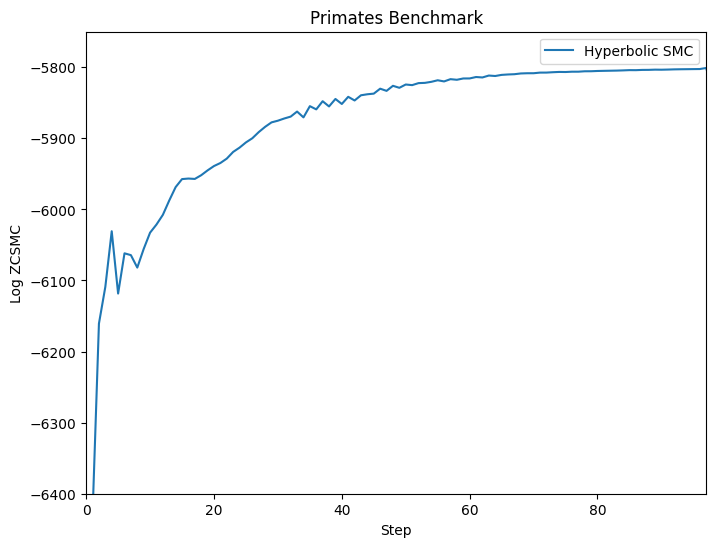

In [5]:
df = pd.read_csv(f"{data_dir}/primates_benchmark.csv")

# Define the column to plot
column = "Name: benchmark_primates-phase1 - Log ZCSMC__MAX"
label = "Hyperbolic SMC"

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(df["Step"], df[column], label=label)

# Set x-axis range
plt.xlim(0, 97)

# Set y-axis range
plt.ylim(-6400, -5750)

# Add labels and title
plt.xlabel("Step")
plt.ylabel("Log ZCSMC")
plt.title("Primates Benchmark")
plt.legend()

# Show the plot
plt.savefig("output/primates_benchmark.pdf")
plt.show()

# Benchmark on Large Datasets


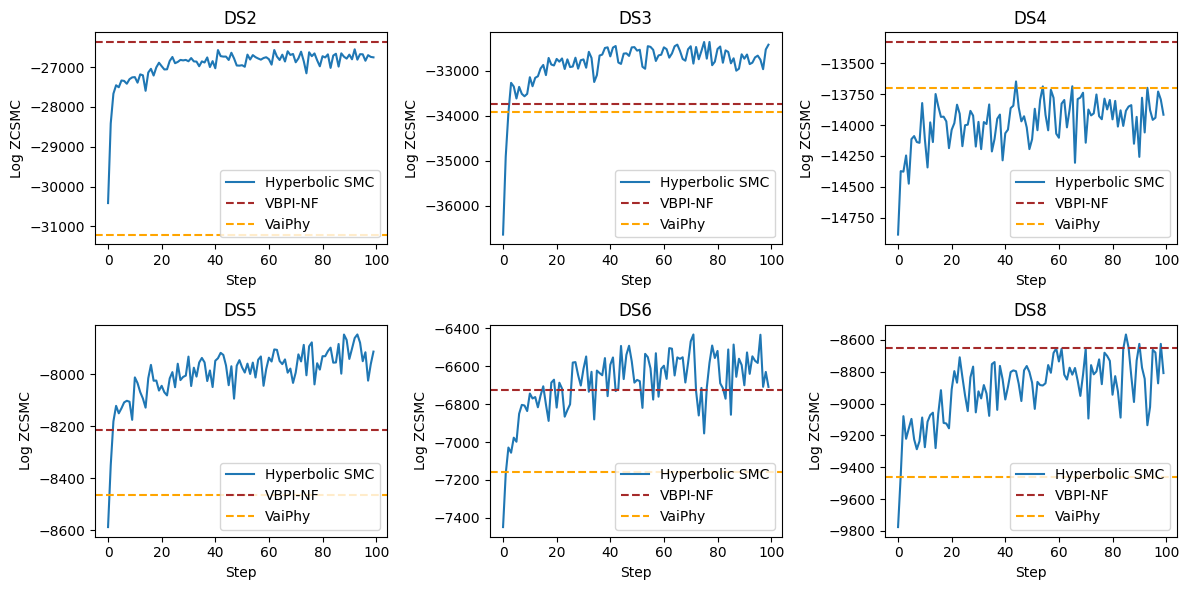

In [6]:
# ds -> (VBPI-NF, VaiPhy)
other_scores = {
    "DS2": (-26367.70, -31203.44),
    "DS3": (-33735.09, -33911.13),
    "DS4": (-13329.93, -13700.86),
    "DS5": (-8214.61, -8464.77),
    "DS6": (-6724.36, -7157.84),
    "DS8": (-8650.49, -9462.21),
}

df = pd.read_csv(f"{data_dir}/large_benchmarks.csv")

# Create a figure with 2 rows and 3 columns
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

datasets = ["DS2", "DS3", "DS4", "DS5", "DS6", "DS8"]

for i, ds in enumerate(datasets):
    ax = axes[i // 3, i % 3]  # type: ignore
    ax.plot(df["Step"], df[f"{ds}-phase1 - Log ZCSMC"], label="Hyperbolic SMC")

    # Add horizontal dashed line for other methods results
    ax.axhline(y=other_scores[ds][0], color="brown", linestyle="--", label="VBPI-NF")
    ax.axhline(y=other_scores[ds][1], color="orange", linestyle="--", label="VaiPhy")

    # Add labels and title
    ax.set_xlabel("Step")
    ax.set_ylabel("Log ZCSMC")
    ax.set_title(ds)
    ax.legend(loc="lower right")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.savefig("output/large_benchmarks.pdf")
plt.show()

In [7]:
df = pd.read_csv(f"{data_dir}/wall_clocks.csv")

datasets = ["DS1", "DS2", "DS3", "DS4", "DS5", "DS6", "DS8"]

for ds in datasets:
    phase1_column = f"{ds}-phase1 - Log ZCSMC"
    phase2_column = f"{ds}-phase2 - Log ZCSMC"

    # find the smallest "Wall Time" valuewith a non-NaN "Log ZCSMC" value
    start_time = df.loc[df[phase1_column].notna(), "Wall Time"].min()

    # find the largest "Wall Time" value with a non-NaN "Log ZCSMC" value
    end_time = df.loc[df[phase2_column].notna(), "Wall Time"].max()

    delta_seconds = end_time - start_time
    delta_minutes = delta_seconds / 60

    print(f"{ds}: {delta_minutes:.2f} minutes")

DS1: 9.46 minutes
DS2: 12.42 minutes
DS3: 12.84 minutes
DS4: 11.42 minutes
DS5: 8.79 minutes
DS6: 14.64 minutes
DS8: 18.55 minutes
